# k - Anonymity Analysis

## a) Randomly generate a dataset (dataframe) with eight columns and 50,000 rows. Each column should be a categorical variable (of arbitrary name) with three levels (of arbitrary names) in approximately equal proportions.

In [37]:
import pandas as pd
import numpy as np

dictionary = dict({
    "A":["a1","a2","a3"],
    "B":["b1","b2","b3"],
    "C":["c1","c2","c3"],
    "I":["i1","i2","i3"],
    "J":["j1","j2","j3"],
    "K":["k1","k2","k3"],
    "X":["x1","x2","x3"],
    "Y":["y1","y2","y3"]
})

np.random.seed(92)

def categorical_df_from_dict(d: dict, size: int) -> pd.DataFrame:
    """ Creates a dataframe with columns = d.keys, where each column is populated with values randomly sampled from d.values."""

    df = pd.DataFrame()

    for key, val in d.items():

        df[key] = np.random.choice(val, size)

    return df

df = categorical_df_from_dict(dictionary, size=50000)

print(df.shape)
display(df.head())

(50000, 8)


,A,B,C,I,J,K,X,Y
0,a3,b2,c3,i3,j1,k3,x1,y3
1,a3,b1,c2,i3,j1,k3,x2,y1
2,a3,b2,c3,i1,j3,k1,x3,y2
3,a3,b2,c2,i3,j1,k2,x3,y3
4,a1,b1,c3,i3,j3,k1,x2,y2


## b) Verify that the proportions of each value are similar for each of the eight columns.

In [38]:
def verify_proportions(df: pd.DataFrame) -> None:
    """ Prints the proportions of values in all columns in the dataframe df. """
    for col in df:
        vals, counts = np.unique(df[col], return_counts=True)

        print(vals)
        print(counts/sum(counts))

verify_proportions(df)

['a1' 'a2' 'a3']
[0.33406 0.33004 0.3359 ]
['b1' 'b2' 'b3']
[0.33304 0.33118 0.33578]
['c1' 'c2' 'c3']
[0.3289 0.3346 0.3365]
['i1' 'i2' 'i3']
[0.33328 0.33416 0.33256]
['j1' 'j2' 'j3']
[0.3339  0.33152 0.33458]
['k1' 'k2' 'k3']
[0.3345  0.33182 0.33368]
['x1' 'x2' 'x3']
[0.33586 0.33352 0.33062]
['y1' 'y2' 'y3']
[0.33464 0.33314 0.33222]


## c) How many unique rows (i.e., permutations of category levels) are possible?

In [39]:
n = 3 # unique values in each column
r = 8 # columns

print(f"Total permutations: {n**r}")

Total permutations: 6561


In [40]:
import itertools

def print_permutations(n: int) -> None:
    """
    Prints the first n permutations from itertools.product and adds the letters so that the variables are labelled the same as defined in 1. a)
    """
    for num, perm in enumerate(itertools.product('123', repeat=8)):
        perm = list(perm)
        letters = ["a","b","c","i","j","k","x","y"]
        for x, y in enumerate(perm):
            perm[x] = letters[x]+y
        print(perm)
        if num >= n-1:
            break

print_permutations(n=9)

['a1', 'b1', 'c1', 'i1', 'j1', 'k1', 'x1', 'y1']
['a1', 'b1', 'c1', 'i1', 'j1', 'k1', 'x1', 'y2']
['a1', 'b1', 'c1', 'i1', 'j1', 'k1', 'x1', 'y3']
['a1', 'b1', 'c1', 'i1', 'j1', 'k1', 'x2', 'y1']
['a1', 'b1', 'c1', 'i1', 'j1', 'k1', 'x2', 'y2']
['a1', 'b1', 'c1', 'i1', 'j1', 'k1', 'x2', 'y3']
['a1', 'b1', 'c1', 'i1', 'j1', 'k1', 'x3', 'y1']
['a1', 'b1', 'c1', 'i1', 'j1', 'k1', 'x3', 'y2']
['a1', 'b1', 'c1', 'i1', 'j1', 'k1', 'x3', 'y3']


## d) Produce a table and appropriate graph which show the frequencies (numbers of groups) by permutation group sizes up to group size of 12. That is, how many groups are unique combinations (group size = 1), how many groups are made up of a pair of matching combinations (group size = 2), how many groups are made up three the same, etc?

In [41]:
unique_perms = (
    df
    .groupby(df.columns.tolist(), as_index=False)
    .size()
    .query("size <= 12")
)

display(unique_perms.groupby('size').count().iloc[:,0])

size
1      31
2      93
3     235
4     454
5     651
6     871
7     977
8     949
9     751
10    591
11    375
12    272
Name: A, dtype: int64

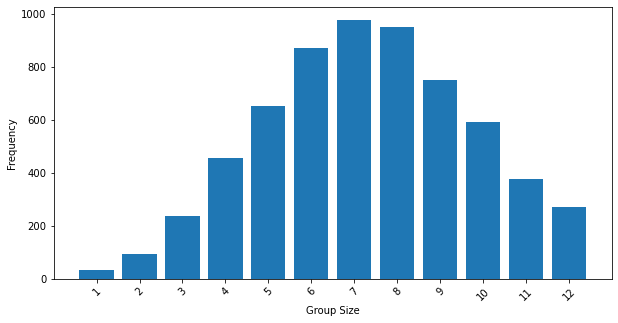

In [42]:
import matplotlib.pyplot as plt

sizes = unique_perms.loc[:, "size"]

def plot_frequency_hist(x: pd.Series) -> tuple:
    """ Creates the frequency histogram plot of the series x. """ 
    fig, ax = plt.subplots(1, 1, figsize=(10,5))

    # define bins and binwidth
    bins = np.arange(min(x.unique()), min(x.unique()) + len(x.unique()) + 1)
    binwidth = 0.8

    # plot hist
    plt.hist(x.values, bins=bins-0.5*binwidth, width=binwidth)

    # formatting
    ax.set_xlabel("Group Size"); ax.set_ylabel("Frequency")
    ax.set_xlim([min(x.unique())-1,min(x.unique())+len(x.unique())])
    ax.set_xticks(bins[:-1])
    ax.set_xticklabels(labels=bins[:-1],rotation=45)

    return fig, ax

fig, ax = plot_frequency_hist(sizes)

plt.show()

## e) Comment upon the distribution of group sizes in d).

AttributeError: 'poisson_gen' object has no attribute 'fit'

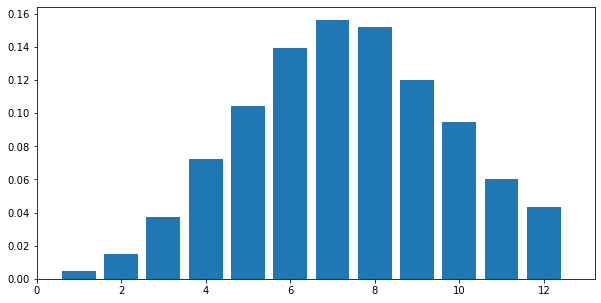

In [48]:
import scipy.stats as st

def hist_fit(x: pd.Series, dists: list) -> tuple:
    """ Creates density histogram plot with fitted distributions""" 

    fig, ax = plt.subplots(1, 1, figsize=(10,5))

    # define bins and binwidth
    bins = np.arange(min(x.unique()), min(x.unique()) + len(x.unique()) + 1)
    binwidth = 0.8

    # plot density
    ax.hist(x.values, bins=bins - 0.5*binwidth,width=binwidth, density=True, label="Frequency Density")

    # experiment with other distributions by adding them to the list
    for dist_name in dists:
        xmin, xmax = ax.get_xlim()
        xx = np.linspace(xmin, xmax, 100)

        dist = getattr(st, dist_name)
        params = dist.fit(x)

        p = dist.pdf(xx, *params)
        ax.plot(xx, p, linewidth=2, label=dist_name.title() + " Distribution Fit")

    # formatting
    ax.set_xlabel("Group Size")
    ax.set_ylabel("Density")
    ax.set_xlim([min(x.unique()) - 1, min(x.unique()) + 1 + len(x.unique())])
    ax.set_xticks(bins[:-1])
    ax.set_xticklabels(labels=bins[:-1], rotation=45)
    plt.legend()

    return fig, ax

fig, ax = hist_fit(sizes, dists=['norm'])

plt.show()

## f) If your random variables were, in fact, meaningful information on individuals, which group sizes are of most concern from a privacy perspective?


## g) Consider the effect of missing data in the dataset you created in 1 a). How might this complicate the production of a frequency table of group sizes in 1 d)?

size
1    16799
2     7076
3     2145
4      496
5      105
6       22
7        3
Name: A, dtype: int64

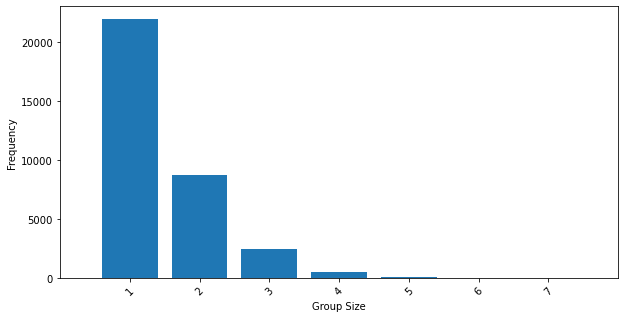

In [46]:
def create_missing_values(df: pd.DataFrame, pct_missing: float=0.2) -> pd.DataFrame:
    """ Chooses random rows and columns and replaces the values with np.nan until the desired portion of missing data is met. """

    n = int(pct_missing*df.shape[0]*df.shape[1])

    # define all possible row/column index combinations
    all_rc_pairs = np.array(list(itertools.product(range(0,len(df)), range(0,8))))

    # randomly select a subset of size n (no replacement)
    idx = np.random.choice(len(all_rc_pairs), replace=False, size=n)
    subset_rc_pairs = all_rc_pairs[idx]

    # replace with np.nan
    for x, y in subset_rc_pairs:
        df.iat[x, y] = np.nan

    return df

df_missing = categorical_df_from_dict(dictionary, size=50000)

df_missing = create_missing_values(df_missing, pct_missing=0.20)

missing_perms = (
    df_missing
    .groupby(df.columns.tolist(), as_index=False, dropna=False) # experiment with dropna=True/False
    .size()
    .query("size <= 12")
)

sizes_missing = missing_perms.loc[:, "size"]

display(missing_perms.groupby('size').count().iloc[:,0])

fig, ax = plot_frequency_hist(sizes_missing)

plt.show()

## h) Imagine the code that you wrote for Part d) was to be deployed in an automated system that Mirador's customers could use independently, on potentially large volumes of their own data. Describe how you might deploy the code, and what additional considerations you might have or any changes to the code you might make. Note: it is not necessary to provide another version of the code created for d).
